In [275]:
# Import các thư viện sử dụng 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Đọc file dữ liệu
df = pd.read_csv('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer-Churn.csv')
df.head()

<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13820\94691185.py:7: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer-Churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [277]:
# Thay thế cột totalcharges còn thiếu 
# Tạo cột Tagers

df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

df['Target'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)


Biểu đồ boxplot của MonthlyCharges


{'whiskers': [<matplotlib.lines.Line2D at 0x1410f331a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1410f331fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1410f331790>],
 'medians': [<matplotlib.lines.Line2D at 0x1410f3323f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1410f332690>],
 'means': []}

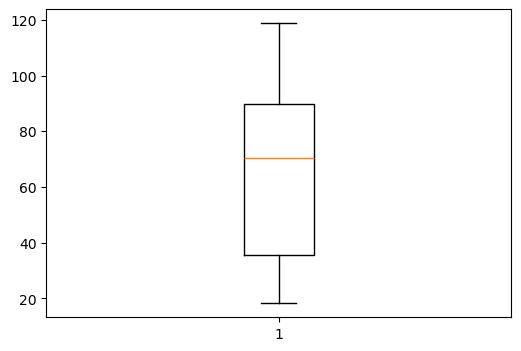

In [278]:
# xem biểu đồ boxplot tìm ra outline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(6,4)
print('Biểu đồ boxplot của MonthlyCharges')
plt.boxplot(df.MonthlyCharges)

Biểu đồ boxplot của Tenure 


{'whiskers': [<matplotlib.lines.Line2D at 0x1410f37eed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1410f37f440>,
 'boxes': [<matplotlib.lines.Line2D at 0x1410f37ec90>],
 'medians': [<matplotlib.lines.Line2D at 0x1410f37f980>],
 'fliers': [<matplotlib.lines.Line2D at 0x1410f37fcb0>],
 'means': []}

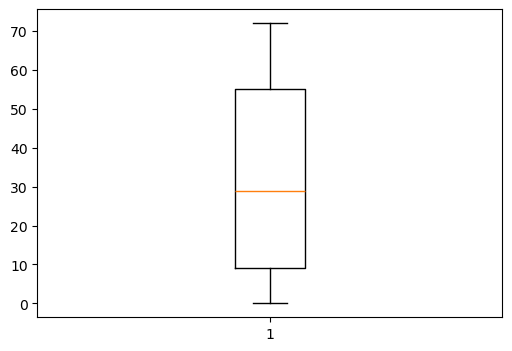

In [279]:
# xem biểu đồ boxplot tìm ra outline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(6,4)
print('Biểu đồ boxplot của Tenure ')
plt.boxplot(df.tenure )

In [280]:
import matplotlib.pyplot as plt
# num_features chứa các features có kiểu dữ liệu là mumber
num_features = df.select_dtypes('number').columns

# Sau khi loại bỏ cột customerID thì ob_features sẽ lưu các cột có kiểu dữ liệu là object
ob_features = df.drop('customerID', axis = 1).select_dtypes(include = 'object').columns

Text(0.5, 1.0, 'Correlation Heatmap')

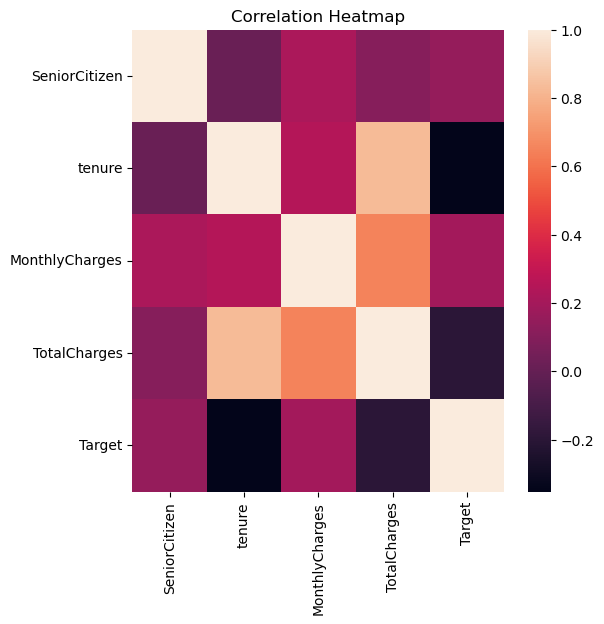

In [281]:
# Xem biểu đồ tương quan giữa các features numner
import seaborn as sns 

plt.figure(figsize = (6, 6))

sns.heatmap(df[num_features].corr())

plt.title('Correlation Heatmap')

In [282]:
!pip install dython

<Axes: >

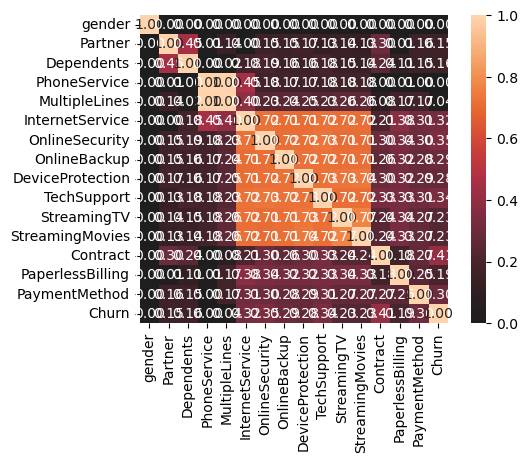

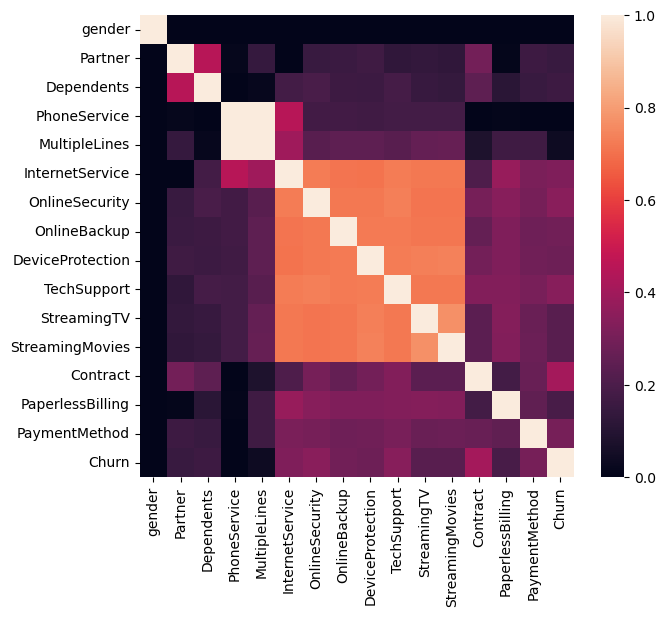

In [283]:
# # Xem biểu đồ tương quan giữa các features object
from dython.nominal import associations
# Sau khi loại bỏ cột customerID thì ob_features sẽ lưu các cột có kiểu dữ liệu là object
ob_features = df.drop('customerID', axis = 1).select_dtypes(include = 'object').columns
assoc = associations(df[ob_features], nominal_columns='all', plot=False)

corr_matrix = assoc['corr']

plt.figure(figsize=(7, 6))

sns.heatmap(corr_matrix)

In [284]:
# Lựa chọn num_features quan trọng
target = 'Target'

num_features = df.select_dtypes(include = [np.number]).columns.drop(target)

correlations = df[num_features].corrwith(df[target]) # tính toán chỉ số tương quan của các features khác so vs target

threshold = 0.3

selected_num_features = correlations[abs(correlations) > threshold].index.tolist() 

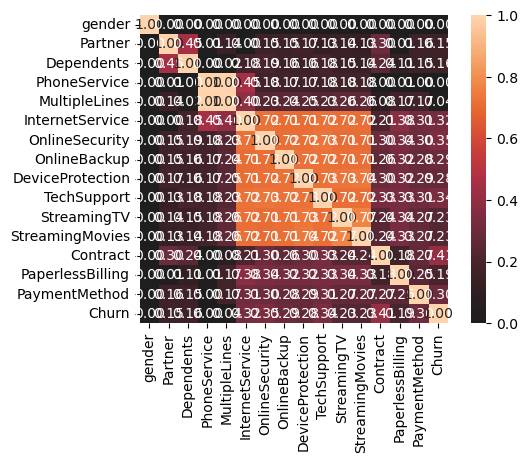

In [285]:
categorical_target = 'Churn'

assoc = associations(df[ob_features], nominal_columns='all', plot=False)

corr_matrix = assoc['corr']

threshold = 0.3

selected_ob_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

del selected_ob_features[-1]

In [286]:
selected_features = ['Churn']

selected_features.extend(selected_num_features)

selected_features.extend(selected_ob_features)

print(selected_features)


['Churn', 'tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


In [287]:
df = df[selected_features]

df

,Churn,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,No,1,DSL,No,No,Month-to-month,Electronic check
1,No,34,DSL,Yes,No,One year,Mailed check
2,Yes,2,DSL,Yes,No,Month-to-month,Mailed check
3,No,45,DSL,Yes,Yes,One year,Bank transfer (automatic)
4,Yes,2,Fiber optic,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...
7038,No,24,DSL,Yes,Yes,One year,Mailed check
7039,No,72,Fiber optic,No,No,One year,Credit card (automatic)
7040,No,11,DSL,Yes,No,Month-to-month,Electronic check
7041,Yes,4,Fiber optic,No,No,Month-to-month,Mailed check


In [288]:
df.describe(exclude = 'number')

,Churn,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043
unique,2,3,3,3,3,4
top,No,Fiber optic,No,No,Month-to-month,Electronic check
freq,5174,3096,3498,3473,3875,2365


In [213]:
df.to_excel('Customer_Churn_TXL1.xlsx', index=False)

In [273]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo bộ mã hóa nhãn
le = LabelEncoder()

# Xác định các cột thuộc loại dữ liệu categorical
is_Category = df.dtypes == object

# Lấy danh sách tên các cột thuộc loại dữ liệu categorical
category_column_list = df.columns[is_Category].tolist()

# Áp dụng bộ mã hóa nhãn cho các cột thuộc loại dữ liệu categorical
df[category_column_list] = df[category_column_list].apply(lambda col: le.fit_transform(col))

In [274]:
df.to_excel('Customer_Churn_TXL2.xlsx', index=False)
df

,Churn,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,0,1,0,0,0,0,2
1,0,34,0,2,0,1,3
2,1,2,0,2,0,0,3
3,0,45,0,2,2,1,0
4,1,2,1,0,0,0,2
...,...,...,...,...,...,...,...
7038,0,24,0,2,2,1,3
7039,0,72,1,0,0,1,1
7040,0,11,0,2,0,0,2
7041,1,4,1,0,0,0,3
